# HOMEWORK 1 - Group 28 (ist1106987, ist1107057)
## II. Programming

### 1.

Best variable: Glucose
Worst Variable: BloodPressure


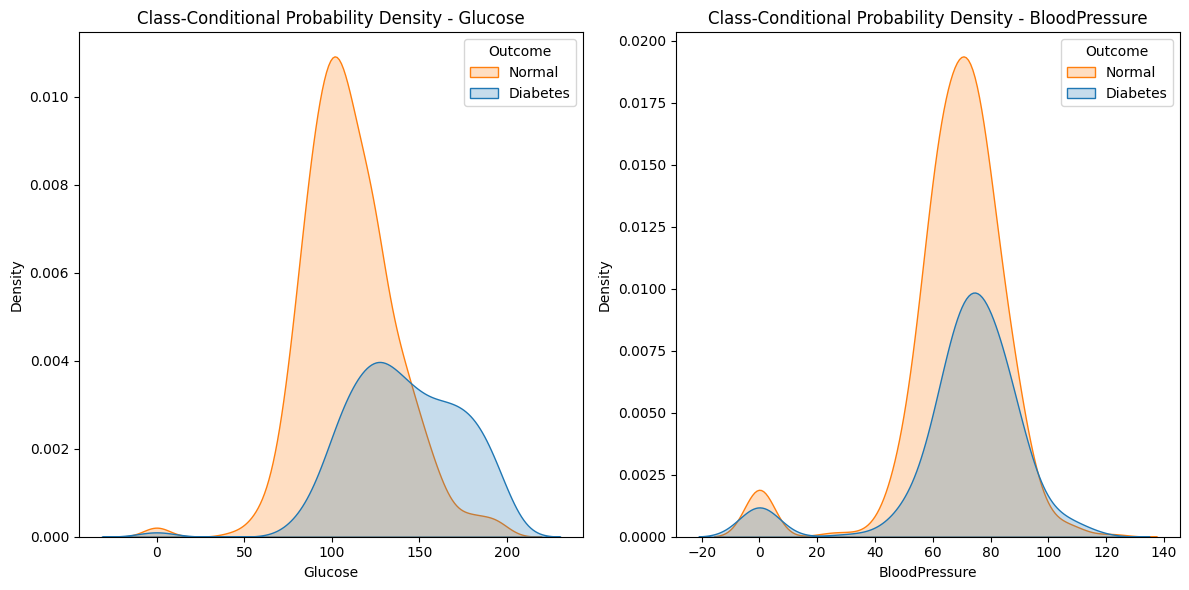

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# load and prepare data
data, meta = loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.iloc[:, :-1] #all variables except outcome
y = df['Outcome'].str.decode('utf-8') # target class

# ANOVA
f_values, p_values = f_classif(X, y)

results = pd.DataFrame({'Variable': X.columns, 'F-value': f_values, 'p-value': p_values})

best_variable = results.loc[results['F-value'].idxmax()]['Variable'] # retrieves the variable with the highest IG
worst_variable = results.loc[results['F-value'].idxmin()]['Variable'] # retrieves the variable with the lowest IG

print(f"Best variable: {best_variable}\nWorst Variable: {worst_variable}")

plt.figure(figsize=(12, 6))

# Best Variable
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x=best_variable, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Probability Density - {best_variable}')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

# Worst Variable
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x=worst_variable, hue='Outcome', fill=True)
plt.title(f'Class-Conditional Probability Density - {worst_variable}')
plt.legend(title='Outcome', labels=['Normal', 'Diabetes'])

plt.tight_layout()
plt.show()

### 2.

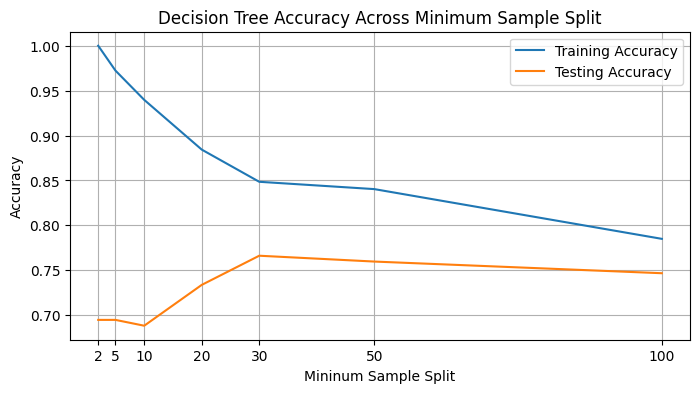

In [2]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# load and prepare data
data, meta = loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.iloc[:, :-1] # all variables except outcome
y = df['Outcome'].str.decode('utf-8') # target class

# the minimum sample split
min_samples_split = [2, 5, 10, 20, 30, 50, 100]

# split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state = 1)

# function that evaluates
def evaluate_decision_tree(X_train, X_test, y_train, y_test, min_samples_splits, n_runs):
    training_accuracies = []
    testing_accuracies = []

    for min in min_samples_split:
        train_acc = []
        test_acc = []

        # since split thresholding of numeric variables is non-determinist, n_runs are made
        for x in range(n_runs):
            predictor = DecisionTreeClassifier(min_samples_split=min, random_state=1)
            predictor.fit(X_train, y_train)

            y_train_pred = predictor.predict(X_train)
            train_acc.append(accuracy_score(y_train, y_train_pred))

            y_test_pred = predictor.predict(X_test)
            test_acc.append(accuracy_score(y_test, y_test_pred))
    
        # averages the results of the n_runs
        training_accuracies.append(np.average(train_acc))
        testing_accuracies.append(np.average(test_acc))

    return training_accuracies, testing_accuracies
    
training_accuracies, testing_accuracies = evaluate_decision_tree(X_train, X_test, y_train, y_test, min_samples_split, 10)

plt.figure(figsize=(8,4))
plt.plot(min_samples_split, training_accuracies, label ='Training Accuracy')
plt.plot(min_samples_split, testing_accuracies, label ='Testing Accuracy')
plt.title('Decision Tree Accuracy Across Minimum Sample Split')
plt.xlabel('Mininum Sample Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_split)
plt.legend()
plt.grid(True)
plt.show()


### 3.

When the minimum sample split is low (2 and 5), the training accuracy is high, . On the other hand, the testing accuracy is much lower (around 0.70), which suggests the model is overfitting and does not have a good generalization capacity. 

From the minimum sample split values of 5 to 30, the training accuracy drops steadily, which is expected considering the threshold makes the tree more constrained, preventing it from overfitting and increasing the model's generalization capacity. This results in a testing accuracy increase which peaks at 30.

From that point, the training accuracy continues to decrease, for the same reasons mentioned earlier, but, unlike before, the testing accuracy also decreases, indicating underfitting. This is due to the fact that the high minimum sample splits causes an oversimplification of the model which will lack the capacity to capture important relationships in the data.

In conclusion, the model suffers from overfitting and poor generalization capacity when the minimum sample split is low and from underfitting when it's too high. The optimal generalization performance is around the minimum sample split of 30, since the gap between training and testing accuracy is lower and both are relatively high. 


### 4.
#### i.

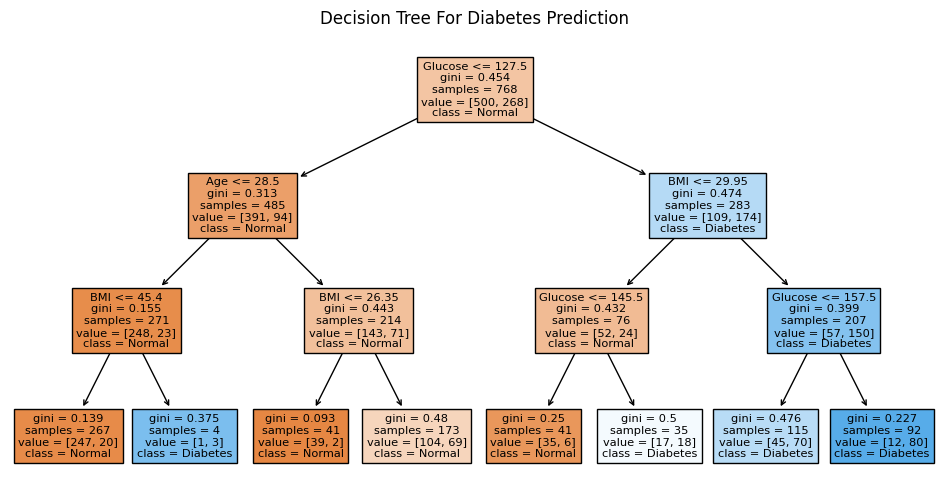

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from scipy.io.arff import loadarff

# load and prepare data
data, meta = loadarff('diabetes.arff')
df = pd.DataFrame(data)

X = df.iloc[:, :-1] # all variables except outcome
y = df['Outcome'].str.decode('utf-8') # target class

predictor = DecisionTreeClassifier(max_depth=3, random_state=1)
predictor.fit(X, y)

plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, filled=True, feature_names=X.columns, class_names=["Normal", "Diabetes"])
plt.title("Decision Tree For Diabetes Prediction")
plt.show()


##### ii.
Glucose higher than 127.5 are strongly associated with diabetes.
Individuals with Glucose below 127.5, but also Age below 28.5 and a BMI higher than 45.4 are also associated with diabetes.

In conclusion, diabetes is generally characterized by high Glucose levels or low Glucose with low Age and high BMI.